# Лабораторная работа 4 

# Правильный многоугольник Рело.
 # Векторизация вычислений в `numpy`

 Компьютерная математика II, ММФ, БГУ
 Домаш Иван

# Задание 4.1. Построение треугольника Рело
# Выполнение задания 4.1


In [300]:
%pip install --upgrade pip
%pip install --user matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%pip install numpy

import numpy as np 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [301]:
%pip install --user matplotlib
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [302]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело


# Этап 1. Вычисление координат вершин правильного треугольника



In [318]:
l = r # !!! равенство справедливо только для треугольника Рело


In [320]:
R = l/(2*np.sin(np.pi/n))

In [322]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [324]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

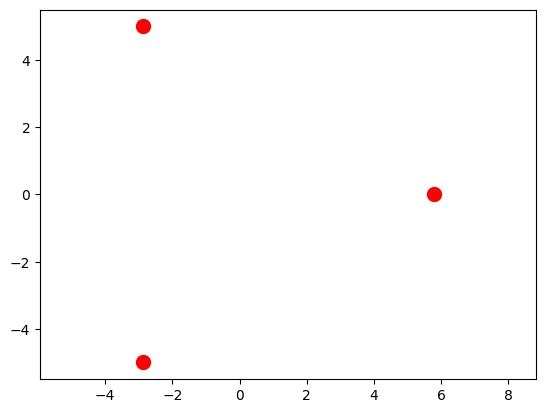

In [326]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

# Этап 2. Представление одной стороны треугольника Рело


In [329]:
alpha = 2*np.pi/n
beta = alpha/2

In [331]:
angle = np.linspace(-beta/2, beta/2, N)


In [333]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])


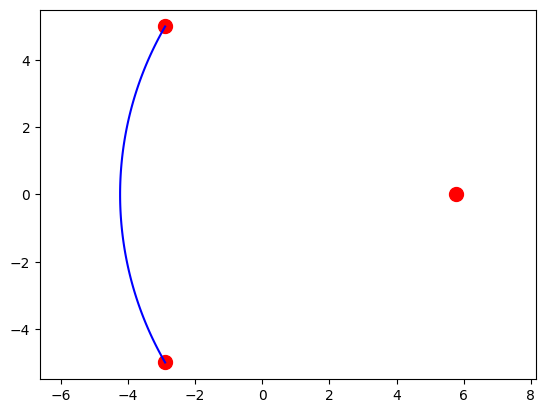

In [335]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');


In [337]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])


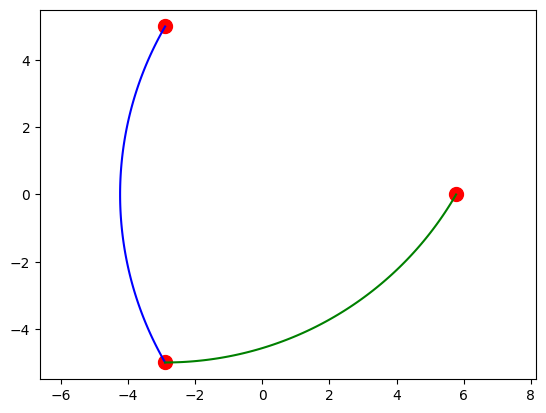

In [339]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');


# Этап 3. Моделирование границы треугольника Рело

In [342]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]


In [344]:
sides = np.concatenate(list_sides)


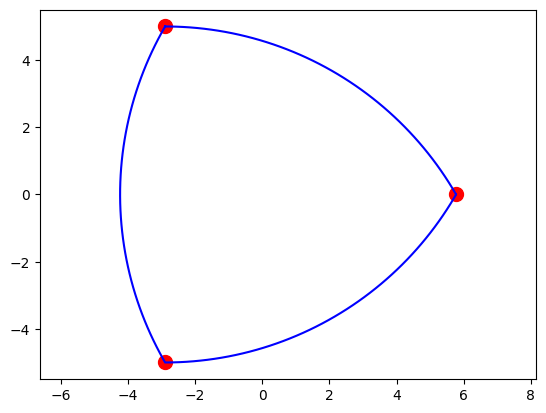

In [346]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');


# Задание 4.2. Построение правильного многоугольника Рело


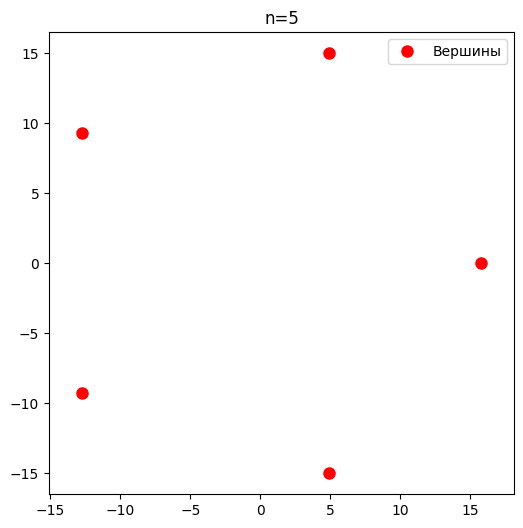

In [349]:


# Задаём исходные параметры:
n = 5  # количество вершин (нечетное число больше 2)
center = np.array([0, 0])
r = 30.0      # ширина многоугольника Рело (радиус используемых кругов)
N = 100       # число точек для описания одной дуговой части


l = 2 * r * np.sin(np.pi / (2 * n))
R = l / (2 * np.sin(np.pi / n))

angles = np.arange(0, 2 * np.pi, 2 * np.pi / n)
vertices = center + R * np.column_stack((np.cos(angles), np.sin(angles)))

plt.figure(figsize=(6,6))
plt.plot(vertices[:, 0], vertices[:, 1], 'ro', markersize=8, label='Вершины')
plt.axis('equal')
plt.title("n=5")
plt.legend()
plt.show()


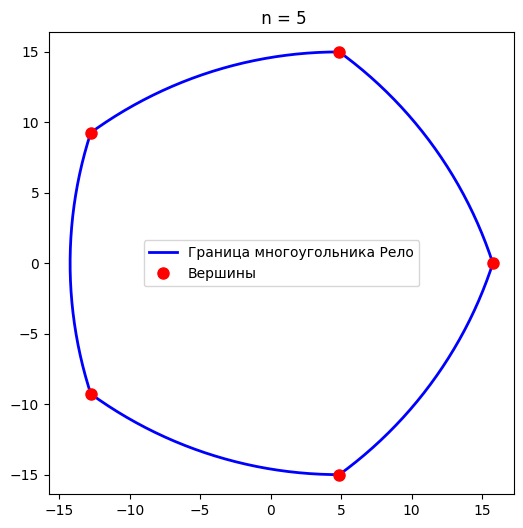

In [351]:
alpha = 2 * np.pi / n  
beta = alpha / 2        

arc_angles = np.linspace(-beta/2, beta/2, N)
side0 = vertices[0] + r * np.column_stack((
    np.cos(arc_angles + np.pi),
    np.sin(arc_angles + np.pi)
))


sides_list = [
    vertices[i] + r * np.column_stack((
        np.cos(arc_angles + np.pi + i * alpha),
        np.sin(arc_angles + np.pi + i * alpha)
    ))
    for i in range(n)
]

sides = np.concatenate(sides_list, axis=0)

plt.figure(figsize=(6,6))
plt.plot(sides[:, 0], sides[:, 1], 'b-', lw=2, label='Граница многоугольника Рело')
plt.plot(vertices[:, 0], vertices[:, 1], 'ro', markersize=8, label='Вершины')
plt.axis('equal')
plt.title(" n = 5")
plt.legend()
plt.show()

## Вывод зависимоти $$ l = 2r \sin\left(\frac{\pi}{2n}\right) $$
Чтобы вывести нужную зависимость, рассмотрим одну вершину базового многоугольника – обозначим её как точку 
𝐴
. На ней строится круг с центром 
𝐴
 и радиусом 
𝑟
. Пусть дуга этого круга, которая входит в состав границы Рело-фигуры, имеет конечные точки (то есть точки касания с дугами из соседних кругов). Из симметрии (так как базисный многоугольник правильный) можно рассматривать медиану, проведённую из 
𝐴
 к середине одного из таких отрезков (хорды).

Обозначим:

𝑀
 — середину хорды, принадлежащей кругу с центром 
𝐴
.

Пусть 
𝑙
 — полная длина хорды (то есть сторона базового многоугольника, которая получается в результате объединения дугов).

Из геометрии известно, что если опустить из центра круга (в нашем случае из 
𝐴
) перпендикуляр к хорде, он делит хорду пополам. То есть длина половины хорды равна 
𝑙
2
.

Теперь рассмотрим получившийся прямоугольный треугольник 
△
𝐴
𝑀
𝑋
 (где 
𝑋
 — конечная точка на хорде). В нём:

Гипотенуза равна 
𝑟
 (так как 
𝑀
 лежит на окружности с центром 
𝐴
).

Один из углов при вершине 
𝐴
 определяется симметрией правильного 
𝑛
-угольника. 



В правильном 
𝑛
-угольнике угол между двумя соседними сторонами равен

$$ 2\pi/n $$ 

При симметричном построении дуговой части (которая строится вокруг вершины 
𝐴
) естественно рассматривать половину этого угла – то есть угол между медианой 
𝐴
𝑀
 (которая, по симметрии, направлена точно посередине между сторонами) и одной из сторон – равен

$$
\frac{1}{2} \cdot \frac{2\pi}{n} = \frac{\pi}{n}
$$


Этот угол говорит нам, что если мы посмотрим на треугольник 𝐴
𝑀
𝑋
 (где 
𝑀
 — основание перпендикуляра, 
𝑋
 — одна из точек на хорде), то угол между радиусом 
𝑟
 (то есть линией 
𝐴
𝑋
) и медианой 
𝐴
𝑀
 равен

$$ \frac{\pi}{n} $$

В получившемся прямоугольном треугольнике:
Гипотенуза 
𝐴
𝑋
 равна 
𝑟
. 
Катет, прилежащий к углу $$ \frac{\pi}{n} $$
 (то есть сторона 
𝐴
𝑀
) равен

$$ r \cos\left(\frac{\pi}{n}\right) $$

Но поскольку 
𝐴
𝑀
 по построению делит хорду пополам, именно 
𝐴
𝑀
 равна половине длины стороны 
𝑙
:

$$ \frac{l}{2} = r \cos\left(\frac{\pi}{n}\right) $$

Отсюда, умножая на 2: 

$$ l = 2r \cos\left(\frac{\pi}{n}\right) $$ или же $$ l = 2r \sin\left(\frac{\pi}{2n}\right) $$

# Задание 4.3. Результирующая пользовательская функция


C:\Users\user\AppData\Local\Temp\ipykernel_4236\729342766.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


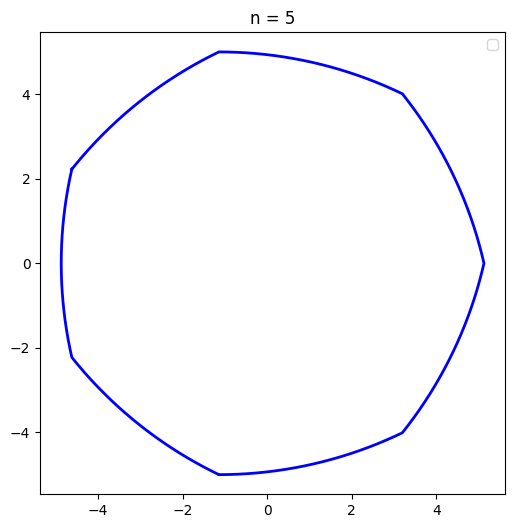

In [281]:
import numpy as np
import matplotlib.pyplot as plt

def regular_polygon_Relo(n: int = 3, center: np.ndarray = np.array([0, 0]), r: float = 1, N: int = 100) -> np.ndarray:
    # Приведение центра к массиву типа float
    if center is None:
        center = np.array([0.0, 0.0])
    else:
        center = np.array(center, dtype=float)

    assert isinstance(n, int) and n > 2 and (n % 2 == 1), "сделайте n нечётным целым числом больше 2"
    assert center.shape == (2,), "центр должен быть в виде массива (x, y)"
    assert isinstance(r, (int, float)) and r > 0, "r должно быть положительным"
    assert isinstance(N, int) and N > 0, "кол - во сторон"

    l: float = 2 * r * np.sin(np.pi / (2 * n))
    R: float = l / (2 * np.sin(np.pi / n))
    angles: np.ndarray = np.arange(0, 2 * np.pi, 2 * np.pi / n)
    vertices: np.ndarray = center + R * np.column_stack((np.cos(angles), np.sin(angles)))

    alpha: float = 2 * np.pi / n
    beta: float = alpha / 2
    arc_angles: np.ndarray = np.linspace(-beta / 2, beta / 2, N)

    sides_list = [
        vertices[i] + r * np.column_stack((
            np.cos(arc_angles + np.pi + i * alpha),
            np.sin(arc_angles + np.pi + i * alpha)
        ))
        for i in range(n)
    ]
    sides: np.ndarray = np.concatenate(sides_list, axis=0)

    return sides

polygon = regular_polygon_Relo(7, np.array([0, 0]), 10, 100)

plt.figure(figsize=(6, 6))
plt.plot(polygon[:, 0], polygon[:, 1], 'b-', lw=2)
plt.axis('equal')
plt.title("n = 5")
plt.legend()
plt.show()


    

    


Ошибка в тесте 1: сделайте n нечётным целым числом больше 2


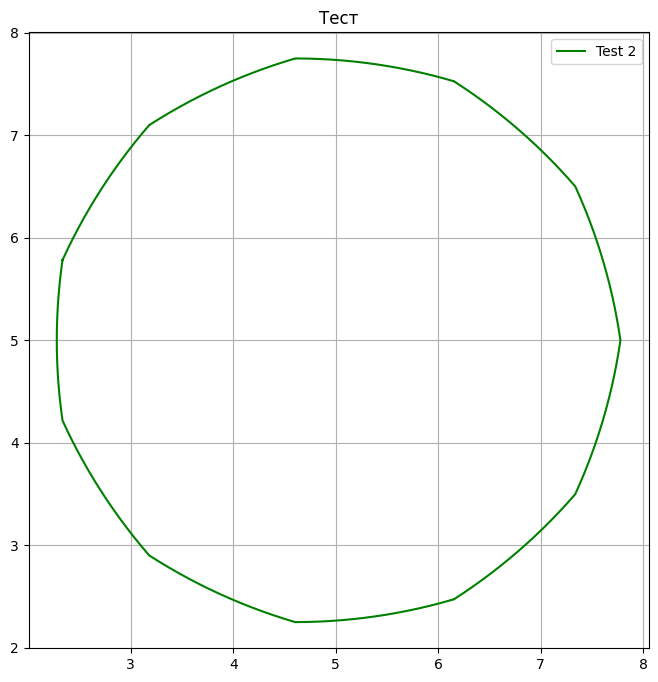

In [283]:


test_cases = [
    
    {"n": 2, "center": np.array([2, 2]), "r": 4, "N": 70},
   
    {"n": 11, "center": np.array([5, 5]), "r": 5.5, "N": 100},
    
]

plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'm', 'c']

for i, case in enumerate(test_cases):
    try:
        points = regular_polygon_Relo(**case) if isinstance(case, dict) else regular_polygon_Relo(*case)
        plt.plot(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f"Test {i+1}")
    except AssertionError as e:
        print(f"Ошибка в тесте {i+1}: {e}")

plt.axis("equal")
plt.legend()
plt.title("Тест")
plt.grid()
plt.show()

Ошибка в тесте 2: r должно быть положительным


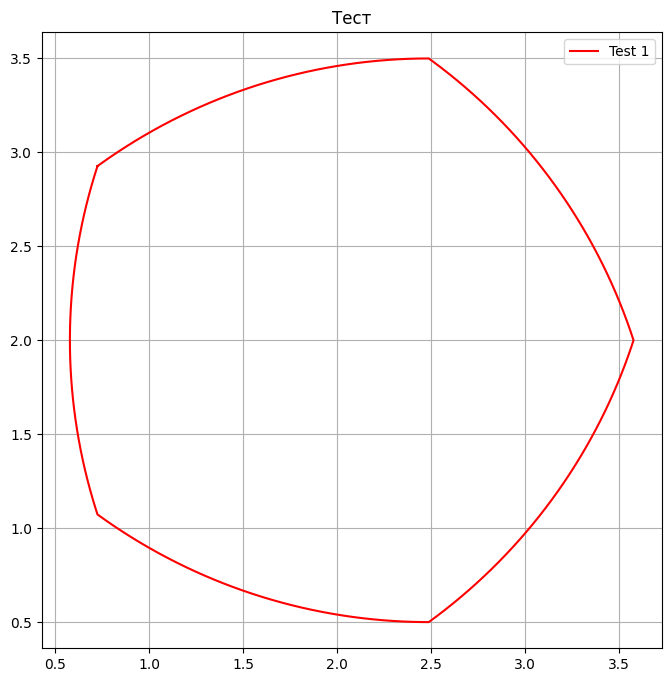

In [285]:

test_cases = [
    
    {"n": 5, "center": np.array([2, 2]), "r": 3, "N": 70},
   
    {"n": 11, "center": np.array([5, 5]), "r": -2, "N": 100},
    
]

plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'm', 'c']

for i, case in enumerate(test_cases):
    try:
        points = regular_polygon_Relo(**case) if isinstance(case, dict) else regular_polygon_Relo(*case)
        plt.plot(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f"Test {i+1}")
    except AssertionError as e:
        print(f"Ошибка в тесте {i+1}: {e}")

plt.axis("equal")
plt.legend()
plt.title("Тест")
plt.grid()
plt.show()

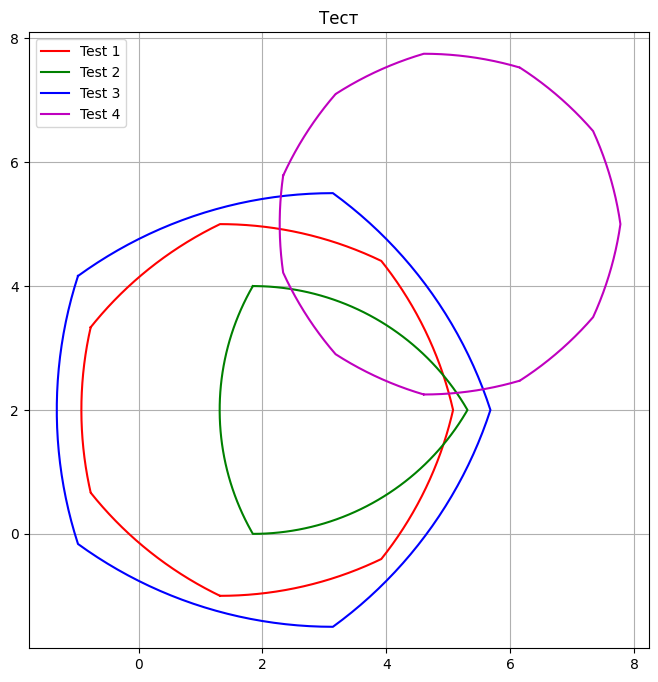

In [287]:
test_cases = [
    {"n": 7, "center": np.array([2, 2]), "r": 6, "N": 90},
    {"n": 3, "center": np.array([3, 2]), "r": 4, "N": 80},
   {"n": 5, "center": np.array([2, 2]), "r": 7, "N": 70},
    {"n": 11, "center": np.array([5, 5]), "r": 5.5, "N": 100},
    
]

plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'm', 'c']

for i, case in enumerate(test_cases):
    try:
        points = regular_polygon_Relo(**case) if isinstance(case, dict) else regular_polygon_Relo(*case)
        plt.plot(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f"Test {i+1}")
    except AssertionError as e:
        print(f"Ошибка в тесте {i+1}: {e}")

plt.axis("equal")
plt.legend()
plt.title("Тест")
plt.grid()
plt.show()